# 1.Цель лабораторной работы: 
изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

# 2.Задание:
1.Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
Для 2.выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
устранение пропусков в данных;
кодирование категориальных признаков;
нормализацию числовых признаков.

# 3 Ход Выполнения работы
 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import OneHotEncoder

Импортировать набор данных

In [4]:
path = "housing.csv"
df = pd.read_csv(path)
print(df.head())
print(df.shape)
list(zip(df.columns, [i for i in df.dtypes]))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
(20640, 10)


[('longitude', dtype('float64')),
 ('latitude', dtype('float64')),
 ('housing_median_age', dtype('float64')),
 ('total_rooms', dtype('float64')),
 ('total_bedrooms', dtype('float64')),
 ('population', dtype('float64')),
 ('households', dtype('float64')),
 ('median_income', dtype('float64')),
 ('median_house_value', dtype('float64')),
 ('ocean_proximity', dtype('O'))]

 Колонки с пропусками

In [5]:
df_with_na = [c for c in df.columns if df[c].isnull().sum() > 0]
df_filling = df[df_with_na]
df_filling.isnull().sum()

total_bedrooms    207
dtype: int64

Заполнение наиболее распространенным значением категории
Для категориальных признаков.

In [6]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

In [7]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [8]:
df_cat_cols = ['total_bedrooms']
df_cat_new = df[df_cat_cols].copy() 
total_bedrooms_cat_new_temp ,_,_= impute_column(df_cat_new,'total_bedrooms','most_frequent')

In [9]:
df_cat_new['total_bedrooms'] =total_bedrooms_cat_new_temp

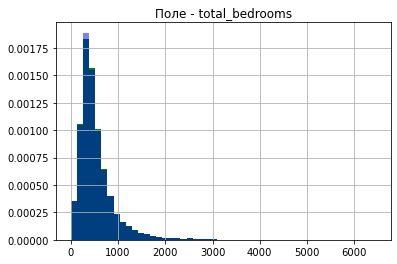

In [13]:
plot_hist_diff(df,df_cat_new, df_filling)

кодирование категориальных признаков;

In [14]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(df[['ocean_proximity']])
cat_enc_ohe

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [15]:
pd.get_dummies(df[['ocean_proximity']]).head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


нормализацию числовых признаков.

In [16]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm",plot=plt)
    plt.show()

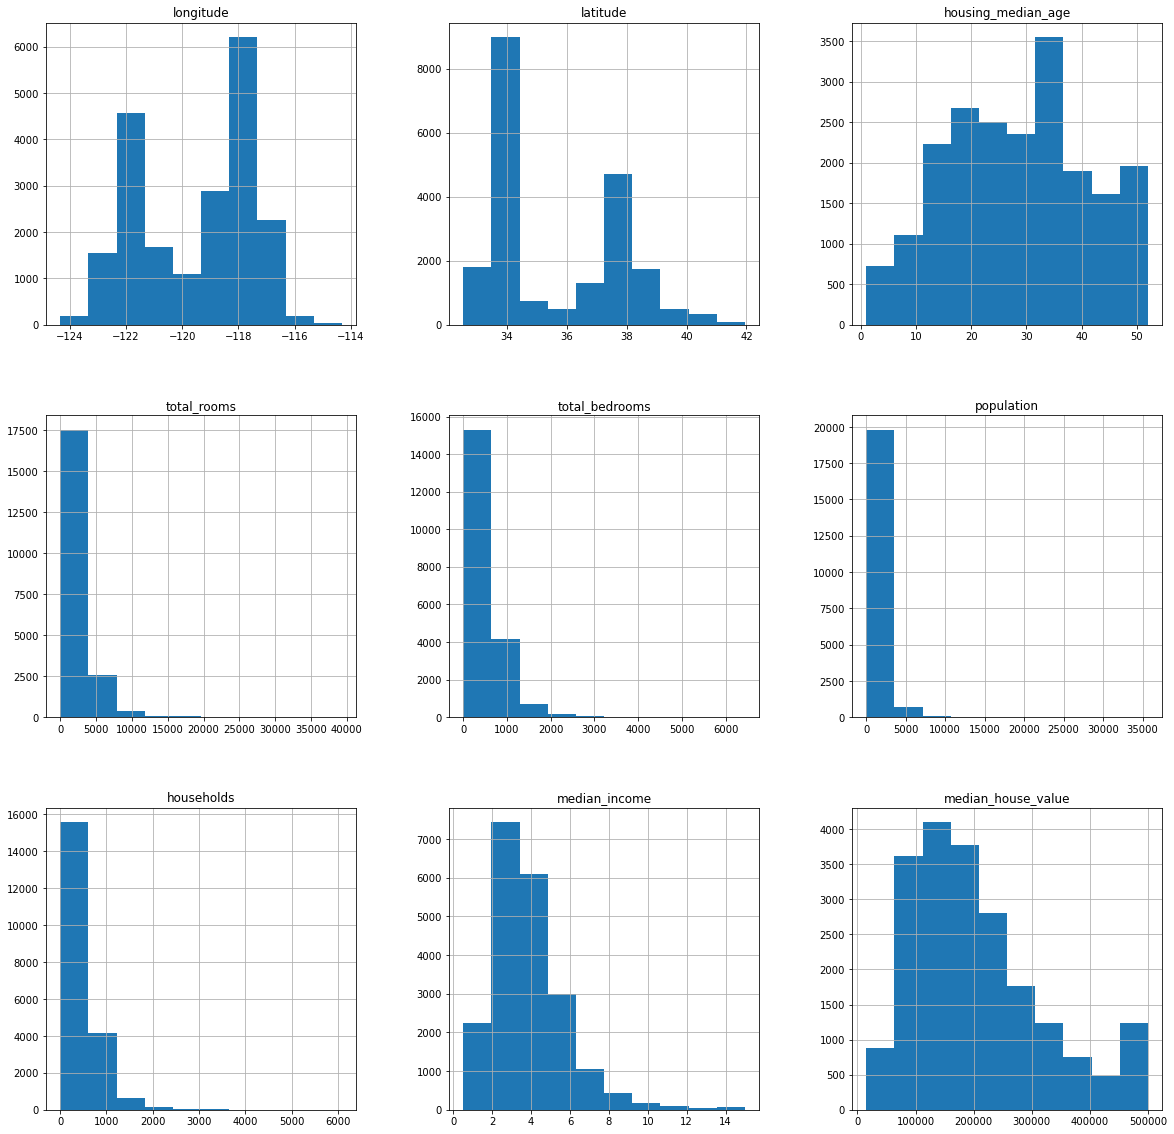

In [113]:
df.hist(figsize=(20,20))
plt.show()

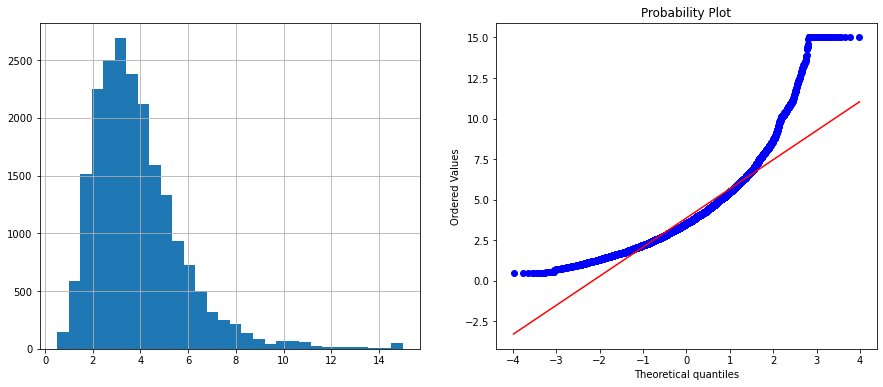

In [17]:
diagnostic_plots(df, 'median_income')

Квадратный корень

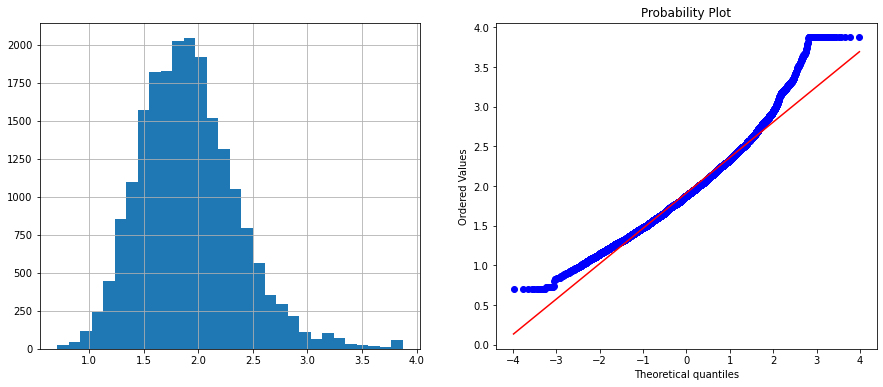

In [18]:
df['median_income'] = df['median_income']**(1/2) 
diagnostic_plots(df, 'median_income')

Обратное преобразование

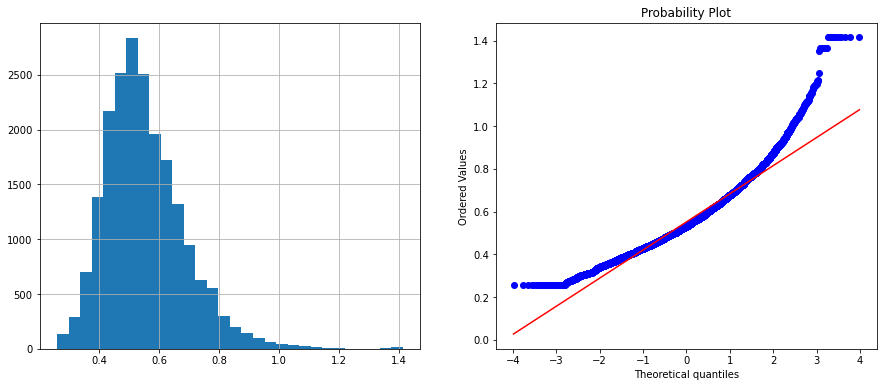

In [19]:
df['median_income'] = 1 / (df['median_income']) 
diagnostic_plots(df, 'median_income')

Логарифмическое преобразование

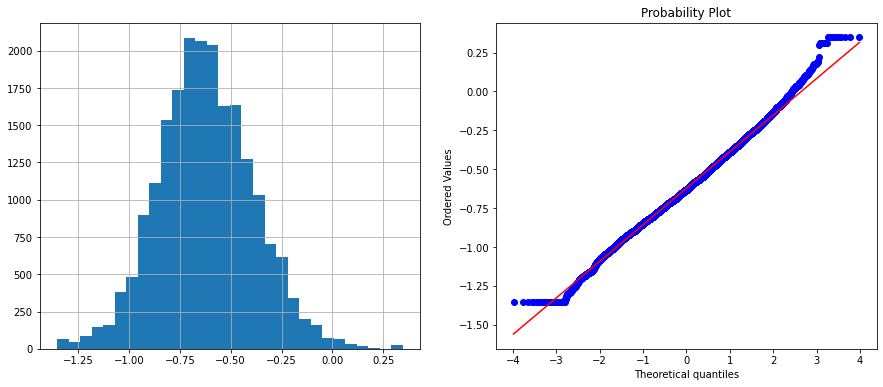

In [20]:
df['median_income'] = np.log(df['median_income'])
diagnostic_plots(df, 'median_income')

Возведение в степень

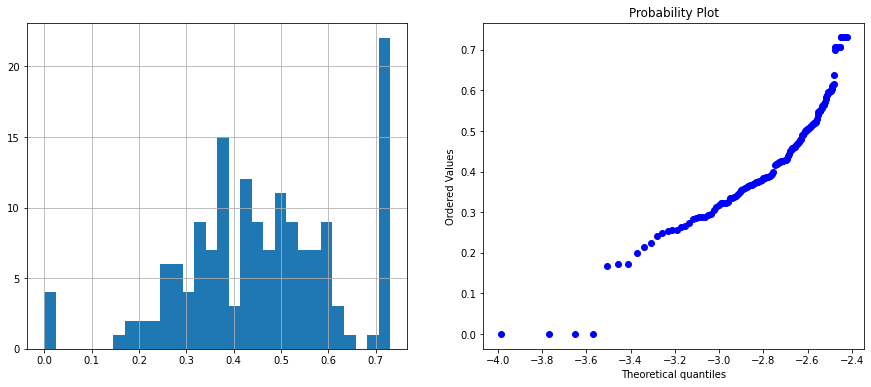

In [23]:
df['median_income'] = df['median_income']**(1/1.5)
diagnostic_plots(df, 'median_income')

Преобразование Бокса-Кокса

Оптимальное значение λ = 0.6679864335410397


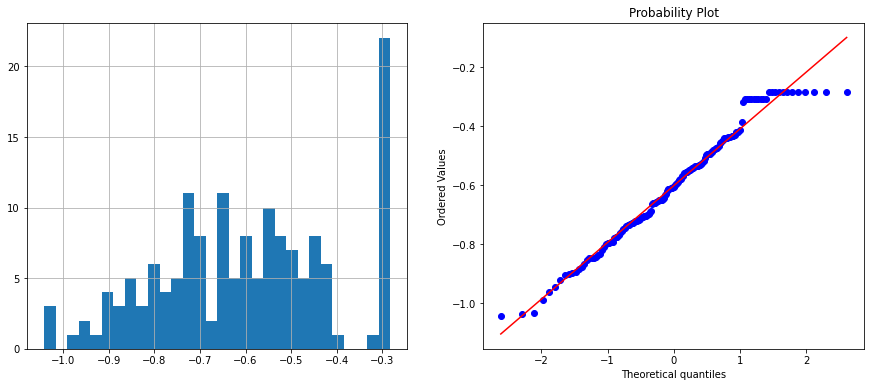

In [32]:
df.dropna(subset=['median_income'])
df=df[df.median_income>0]
df['median_income_boxcox'], param = stats.boxcox(df['median_income']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(df, 'median_income_boxcox')

Преобразование Йео-Джонсона

Оптимальное значение λ = 0.11929781102795793


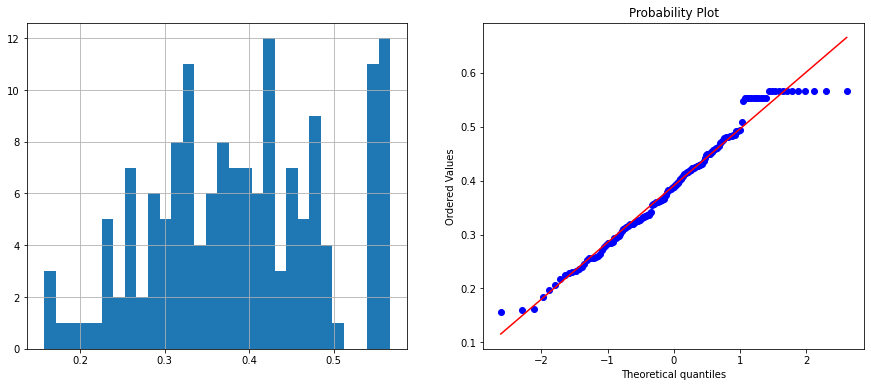

In [33]:
df['median_income_yeojohnson'], param = stats.yeojohnson(df['median_income']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(df, 'median_income_yeojohnson')